### Step 1: Importing Data

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
# Importing the data

churn = pd.read_csv('telecom_churn_data.csv')

In [5]:
# First 5 rows of the data

churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Step 2: Inspecting the Dataframe

In [6]:
# Let's check the dimensions of the dataframe

churn.shape



(99999, 226)

In [7]:
# let's look at the statistical aspects of the dataframe

churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Let's see the type of each column

churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Let's create the backup

original = churn.copy()

In [9]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list

print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Step 3: Handling the Missing Values

In [10]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Let's look at the missing value ratio in each column

churn.isnull().sum()*100/churn.shape[0]




mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [11]:
# Lets impute missing values

### i) Imputing with zeroes

# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [12]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), 
       ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
7                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
10                NaN                      NaN
11                NaN                      NaN
12                NaN                      NaN
13                NaN                      NaN
14                NaN                      NaN
15                NaN                      NaN
16                NaN                      NaN
17                NaN                      NaN
18                NaN                      NaN
20                NaN                      NaN
21                NaN                      NaN
22                NaN                      NaN

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month

In [13]:
# Lets create a list of recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [14]:
# impute missing values with 0

churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
# Let's make sure values are imputed correctly

print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [16]:
# Dropping 'ID' and 'Date' columns

print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


## ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [17]:
# We will replace missing values with '-1' in categorical columns

churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [18]:
# missing value ratio

print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [19]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0        loc_og_t2o_mou     True
1        std_og_t2o_mou     True
2        loc_ic_t2o_mou     True
3                arpu_6     True
4                arpu_7     True
5                arpu_8     True
6                arpu_9     True
7           onnet_mou_6     True
8           onnet_mou_7     True
9           onnet_mou_8     True
10          onnet_mou_9     True
11         offnet_mou_6     True
12         offnet_mou_7     True
13         offnet_mou_8     True
14         offnet_mou_9     True
15        roam_ic_mou_6     True
16        roam_ic_mou_7     True
17        roam_ic_mou_8     True
18        roam_ic_mou_9     True
19        roam_og_mou_6     True
20        roam_og_mou_7     True
21        roam_og_mou_8     True
22        roam_og_mou_9     True
23     loc_og_t2t_mou_6     True
24     loc_og_t2t_mou_7     True
25     loc_og_t2t_mou_8     True
26     loc_og_t2t_mou_9     True
27     loc_og_t2m_mou_6     True
28     loc_og_t2m_mou_7     True
29     loc_og_t2m_mou_8     True
30     loc_og_t2m_mou_9     True
31     loc_og_t2f_mou_6     True
32     loc_og_t2f_mou_7     True
33     loc_og_t2f_mou_8     True
34     loc_og_t2f_mou_9     True
35     loc_og_t2c_mou_6     True
36     loc_og_t2c_mou_7     True
37     loc_og_t2c_mou_8     True
38     loc_og_t2c_mou_9     True
39         loc_og_mou_6     True
40         loc_og_mou_7     True
41         loc_og_mou_8     True
42         loc_og_mou_9     True
43     std_og_t2t_mou_6     True
44     std_og_t2t_mou_7     True
45     std_og_t2t_mou_8     True
46     std_og_t2t_mou_9     True
47     std_og_t2m_mou_6     True
48     std_og_t2m_mou_7     True
49     std_og_t2m_mou_8     True
50     std_og_t2m_mou_9     True
51     std_og_t2f_mou_6     True
52     std_og_t2f_mou_7     True
53     std_og_t2f_mou_8     True
54     std_og_t2f_mou_9     True
55     std_og_t2c_mou_6     True
56     std_og_t2c_mou_7     True
57     std_og_t2c_mou_8     True
58     std_og_t2c_mou_9     True
59         std_og_mou_6     True
60         std_og_mou_7     True
61         std_og_mou_8     True
62         std_og_mou_9     True
63         isd_og_mou_6     True
64         isd_og_mou_7     True
65         isd_og_mou_8     True
66         isd_og_mou_9     True
67         spl_og_mou_6     True
68         spl_og_mou_7     True
69         spl_og_mou_8     True
70         spl_og_mou_9     True
71          og_others_6     True
72          og_others_7     True
73          og_others_8     True
74          og_others_9     True
75       total_og_mou_6     True
76       total_og_mou_7     True
77       total_og_mou_8     True
78       total_og_mou_9     True
79     loc_ic_t2t_mou_6     True
80     loc_ic_t2t_mou_7     True
81     loc_ic_t2t_mou_8     True
82     loc_ic_t2t_mou_9     True
83     loc_ic_t2m_mou_6     True
84     loc_ic_t2m_mou_7     True
85     loc_ic_t2m_mou_8     True
86     loc_ic_t2m_mou_9     True
87     loc_ic_t2f_mou_6     True
88     loc_ic_t2f_mou_7     True
89     loc_ic_t2f_mou_8     True
90     loc_ic_t2f_mou_9     True
91         loc_ic_mou_6     True
92         loc_ic_mou_7     True
93         loc_ic_mou_8     True
94         loc_ic_mou_9     True
95     std_ic_t2t_mou_6     True
96     std_ic_t2t_mou_7     True
97     std_ic_t2t_mou_8     True
98     std_ic_t2t_mou_9     True
99     std_ic_t2m_mou_6     True
100    std_ic_t2m_mou_7     True
101    std_ic_t2m_mou_8     True
102    std_ic_t2m_mou_9     True
103    std_ic_t2f_mou_6     True
104    std_ic_t2f_mou_7     True
105    std_ic_t2f_mou_8     True
106    std_ic_t2f_mou_9     True
107    std_ic_t2o_mou_6     True
108    std_ic_t2o_mou_7     True
109    std_ic_t2o_mou_8     True
110    std_ic_t2o_mou_9     True
111        std_ic_mou_6     True
112        std_ic_mou_7     True
113        std_ic_mou_8     True
114        std_ic_mou_9     True
115      total_ic_mou_6     True
116      total_ic_mou_7     True
117      total_ic_mou_8     True
118      total_ic_mou_9     True
119        spl_ic_mou_6     True
120        spl_ic_mou_

In [20]:
# drop columns
churn = churn.loc[:, include_cols]

dropped_cols = chrun.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

NameError: name 'chrun' is not defined

In [21]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount

churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [22]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount

churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [24]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [25]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 478.0


In [26]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 201)

In [27]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 196)

#### Now we have 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

## Filter high-value customers

In [28]:
#calculate total data recharge amount

# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount

churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

## Add total data recharge and total recharge to get total combined recharge amount for a month

In [29]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount

churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [30]:
# calculate average recharge done by customer in June and July

churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [31]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [32]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 201)

In [33]:
# delete variables created to filter high-value customers

churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 196)

##### We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [34]:
## Derive churn

# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [35]:
# Calculate 2g and 3g data consumption

churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [36]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [37]:
# Delete derived variables

churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [38]:
# Change data type to category

churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Calculate difference between 8th and previous months

######### Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [40]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

In [41]:
# let's look at summary of one of the difference variables

churn_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

##### Delete columns that belong to the churn month (9th month)

In [42]:
# delete all variables relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 173)

In [43]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

##### Visualise data

In [44]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [46]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)


## Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


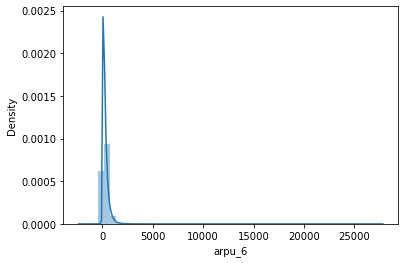

In [47]:
univariate(churn.arpu_6)

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


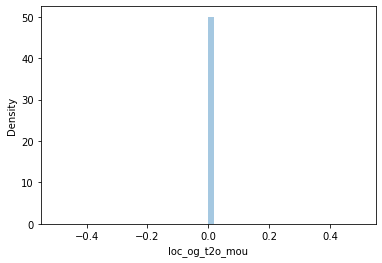

In [48]:
univariate(churn.loc_og_t2o_mou)

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


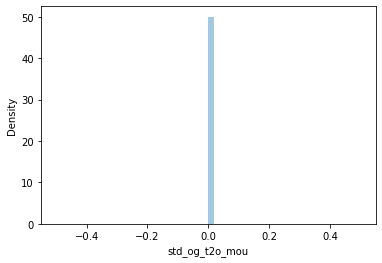

In [49]:

univariate(churn.std_og_t2o_mou)

In [50]:
univariate(churn.onnet_mou_8)

count    94621.000000
mean       133.018098
std        308.951589
min          0.000000
25%          6.460000
50%         32.360000
75%        115.860000
max      10752.560000
Name: onnet_mou_8, dtype: float64


In [51]:
univariate(churn.offnet_mou_9)

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
25%         27.130000
50%         87.290000
75%        220.505000
max      10310.760000
Name: offnet_mou_9, dtype: float64


### Bivariate EDA

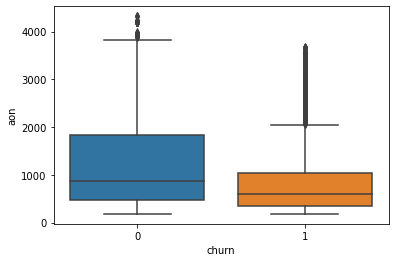

In [52]:
bivariate(churn_filtered.churn, churn_filtered.aon)

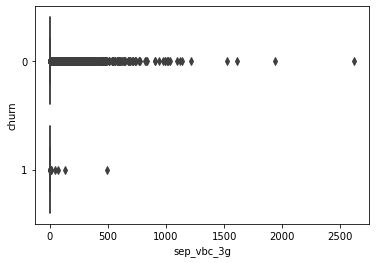

In [53]:
bivariate(churn_filtered.sep_vbc_3g, churn_filtered.churn)



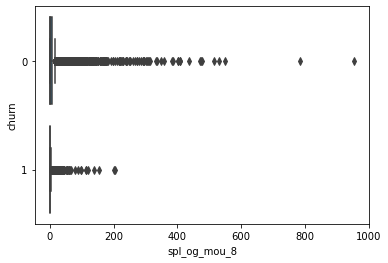

In [54]:
bivariate(churn_filtered.spl_og_mou_8, churn_filtered.churn)

In [55]:
pd.crosstab(churn_filtered.churn, churn_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8      -1.0        0.0        1.0
churn                                           
0                 85.89123  97.117602  97.360704
1                 14.10877   2.882398   2.639296

In [85]:
pd.crosstab(churn_filtered.churn, churn_filtered.sachet_3g_8)

sachet_3g_8     0     1    2    3    4   5   6   7   8   9   10  11  12  13  \
churn                                                                         
0            24972  1609  399  184  106  86  43  35  28  19  15   8  11  10   
1             2369    48    5    8    4   2   1   0   2   0   0   0   0   1   

sachet_3g_8  14  15  16  17  18  19  20  21  23  25  27  29  30  38  41  
churn                                                                    
0             6   6   2   2   3   1   3   3   2   1   1   1   2   1   1  
1             0   0   1   0   0   0   0   0   0   0   0   0   0   0   0

## Cap outliers in all numeric variables with k-sigma technique

In [56]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [57]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [58]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

# Modelling
..i) Making predictions

In [59]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Preprocessing data
..

In [60]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

# Train Test split


In [61]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [62]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 172)

(22500,)

(7501, 172)

(7501,)

# Aggregating the categorical columns

In [63]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.099165
0.0     0.066797
1.0     0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
0.0     0.055494
1.0     0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
0.0     0.029023
1.0     0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
0.0     0.069460
1.0     0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
0.0     0.059305
1.0     0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churn, dtype: float64

In [64]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [65]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [66]:
from sklearn.decomposition import PCA

In [67]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [68]:
#Import PCA
from sklearn.decomposition import PCA

In [69]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [70]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [71]:
# fit model
model.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [ ]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [ ]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [73]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  nan
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 60}


In [74]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [75]:
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0               NaN           NaN           NaN          0.00           NaN   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48       

In [76]:
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

NameError: name 'intercept_df' is not defined

In [81]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [88]:
pca.fit


<bound method Pipeline.fit of Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])>

In [91]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)


In [94]:
# predict churn on test data
pca.fit


<bound method Pipeline.fit of Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])>

In [95]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [100]:
# cross validation results
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0               NaN           NaN           NaN          0.00           NaN   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48       

In [102]:
churn.head

<bound method NDFrame.head of        loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
0                 0.0             0.0             0.0  197.385  214.816   
1                 0.0             0.0             0.0   34.047  355.074   
2                 0.0             0.0             0.0  167.690  189.058   
3                 0.0             0.0             0.0  221.338  251.102   
4                 0.0             0.0             0.0  261.636  309.876   
...               ...             ...             ...      ...      ...   
99994             0.0             0.0             0.0   18.471   69.161   
99995             0.0             0.0             0.0  112.201   77.811   
99996             0.0             0.0             0.0  229.187    0.000   
99997             0.0             0.0             0.0  322.991  303.386   
99998             0.0             0.0             0.0  687.065    0.000   

        arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet

In [104]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 201 entries, loc_og_t2o_mou to av_amt_data_6_7
dtypes: float64(168), int64(33)
memory usage: 153.3 MB


In [107]:
churn.isnull()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  arpu_7  arpu_8  \
0               False           False           False   False   False   False   
1               False           False           False   False   False   False   
2               False           False           False   False   False   False   
3               False           False           False   False   False   False   
4               False           False           False   False   False   False   
...               ...             ...             ...     ...     ...     ...   
99994           False           False           False   False   False   False   
99995           False           False           False   False   False   False   
99996           False           False           False   False   False   False   
99997           False           False           False   False   False   False   
99998           False           False           False   False   False   False   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       False         True         True        False         True   
1       False        False        False        False        False   
2       False        False        False        False        False   
3       False        False        False        False        False   
4       False        False        False        False        False   
...       ...          ...          ...          ...          ...   
99994   False        False        False        False        False   
99995   False        False        False        False        False   
99996   False        False         True         True         True   
99997   False        False        False        False        False   
99998   False        False         True         True         True   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              True          True         False          True           True   
1             False         False         False         False          False   
2             False         False         False         False          False   
3             False         False         False         False          False   
4             False         False         False         False          False   
...             ...           ...           ...           ...            ...   
99994         False         False         False         False          False   
99995         False         False         False         False          False   
99996         False          True          True          True          False   
99997         False         False         False         False          False   
99998         False          True          True          True          False   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0               True          False           True           True   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
99994          False          False          False          False   
99995          False          False          False          False   
99996           True           True           True          False   
99997          False          False          False          False   
99998           True           True           True          False   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0               True          False           True              True   
1              False          False          False             False   
2              False          False          False             False   
3              False          False          False             False   
4              False          False          False     

In [110]:
churn.shape

(99999, 201)

# Business Insights

Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.